Sandeep Rawat 
200010067

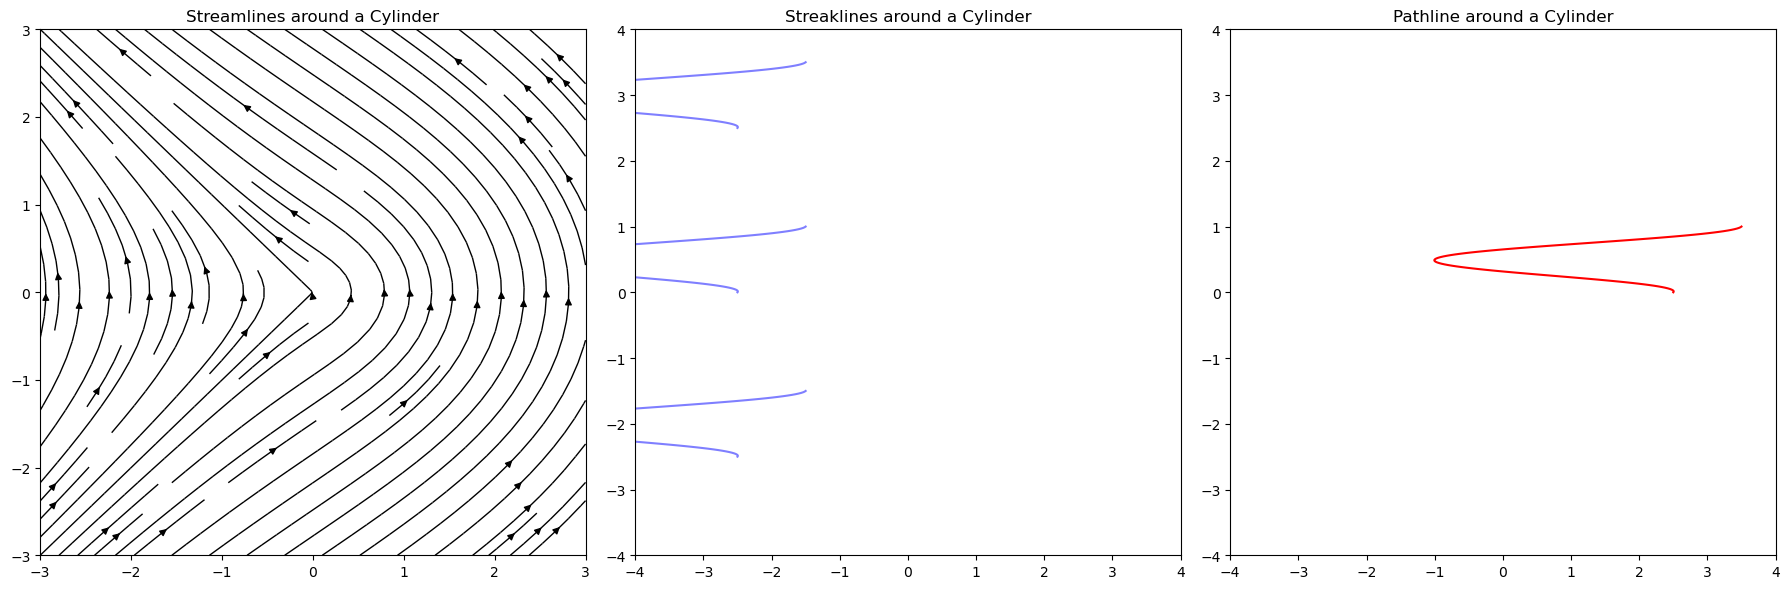

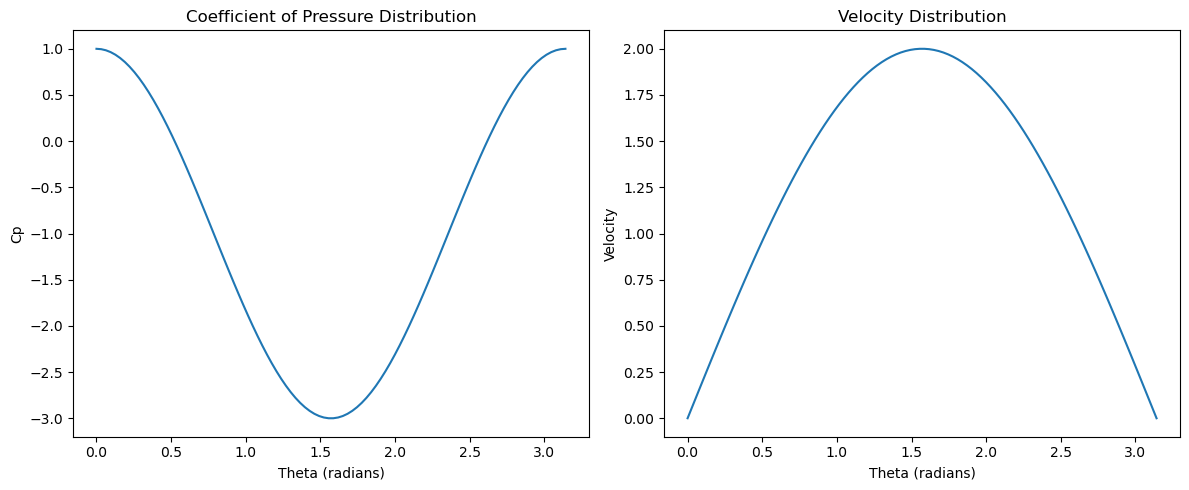

interactive(children=(FloatSlider(value=5.0, description='T', max=10.0, step=0.5), Output()), _dom_classes=('w…

interactive(children=(FloatSlider(value=5.0, description='T', max=10.0, step=0.5), Output()), _dom_classes=('w…

interactive(children=(FloatSlider(value=0.0, description='T', max=5.0, min=-5.0, step=0.5), Output()), _dom_cl…

interactive(children=(FloatSlider(value=0.0, description='T', max=5.0, min=-5.0, step=0.5), Output()), _dom_cl…

<function __main__.cp_with_vortex(T)>

In [5]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math
from ipywidgets import interact

# Define cylinder function
def cylinder_function(state, t):
    x, y = state
    U = 1       # Free stream velocity
    a = 1       # Cylinder radius
    dxdt = -2 * U * np.sin(t) + U / (2 * np.pi * a)  # X velocity component
    dydt = U / (2 * np.pi * a)  # Y velocity component
    return [dxdt, dydt]

# Create a grid of points
x_range = np.linspace(-3, 3, 400)
y_range = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_range, y_range)

# Calculate velocities at each grid point
U = -2 * np.sin(np.arctan2(Y, X))
V = np.ones_like(U) * U[0, 0]  # Uniform flow in the Y direction

# Time values for integration
t_streak = np.linspace(0, 2 * np.pi, 100)  # Time values for streaklines and pathlines

# Create subplots for streamlines, streaklines, and pathlines
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Streamlines
ax = axes[0]
ax.streamplot(X, Y, U, V, density=1, color='black', linewidth=1)
ax.set_title('Streamlines around a Cylinder')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# Streaklines
ax = axes[1]
for start_point in [[-2.5, 2.5], [-2.5, 0.0], [-2.5, -2.5]]:
    traj = odeint(cylinder_function, start_point, t_streak)
    ax.plot(traj[:, 0], traj[:, 1], color='blue', alpha=0.5)
ax.set_title('Streaklines around a Cylinder')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# Pathlines
ax = axes[2]
traj = odeint(cylinder_function, [2.5, 0.0], t_streak)
ax.plot(traj[:, 0], traj[:, 1], color='red', label='Pathline')
ax.set_title('Pathline around a Cylinder')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

plt.tight_layout()
plt.show()

# Potential Flow Analysis for Incompressible Fluid Mechanics

# Define constants and parameters
U = 1       # Free stream velocity
a = 1       # Cylinder radius
rho = 1000  # Density of the fluid
PO = 100000 # Reference pressure

# Velocity and Coefficient of Pressure Distribution

t = np.linspace(0, np.pi, 100)

# Calculate velocity and coefficient of pressure
def cp(t):
    return (1 - 4 * (np.sin(t) ** 2))

def v(t):
    return 2 * np.sin(t)

# Plotting the coefficient of pressure and velocity distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, cp(t))
plt.title('Coefficient of Pressure Distribution')
plt.xlabel('Theta (radians)')
plt.ylabel('Cp')

plt.subplot(1, 2, 2)
plt.plot(t, v(t))
plt.title('Velocity Distribution')
plt.xlabel('Theta (radians)')
plt.ylabel('Velocity')

plt.tight_layout()
plt.show()

# Stream Function and Vortex Strength

x, y = np.mgrid[-2:2:100j, -2:2:100j]

# Calculate the stream function with vortex strength
def stream_function(T):
    s = y * (1 - (1 / (x ** 2 + y ** 2))) - T * np.log(np.sqrt(x ** 2 + y ** 2)) / (2 * np.pi)
    plt.contour(x, y, s, levels=200)

# Interactive plot for varying vortex strength (Gamma)
interact(stream_function, T=(0, 10, 0.5))

# Pressure Distribution

t = np.linspace(0, 2 * np.pi, 100)

# Calculate pressure distribution with varying vortex strength
def pressure_distribution(T):
    p = PO + rho * ((U ** 2 - (T / (2 * a * np.pi) - 2 * U * np.sin(t)) ** 2) / 2)
    plt.plot(t, p)
    plt.title('Pressure Distribution')
    plt.xlabel('Theta (radians)')
    plt.ylabel('Pressure (Pa)')

# Interactive plot for varying vortex strength (Gamma)
interact(pressure_distribution, T=(0, 10, 0.5))

# Velocity Distribution with Vortex

# Calculate velocity distribution with added vortex
def vortex_velocity_distribution(T):
    def v_with_vortex(t):
        return -2 * U * np.sin(t) + T / (2 * a * np.pi)

    plt.plot(t, v_with_vortex(t))
    plt.title('Velocity Distribution with Vortex')
    plt.xlabel('Theta (radians)')
    plt.ylabel('Velocity')

# Interactive plot for varying vortex strength (Gamma)
interact(vortex_velocity_distribution, T=(-5, 5, 0.5))

# Coefficient of Pressure Distribution with Vortex

# Calculate coefficient of pressure distribution with vortex
def cp_with_vortex(T):
    def c_with_vortex(t):
        return 1 - 4 * (np.sin(t)) ** 2 + 2 * T * np.sin(t) / (a * U * np.pi) - (T ** 2) / (2 * np.pi ** 2 * a ** 2 * U ** 2)

    plt.plot(t, c_with_vortex(t))
    plt.title('Coefficient of Pressure Distribution with Vortex')
    plt.xlabel('Theta (radians)')
    plt.ylabel('Cp')

# Interactive plot for varying vortex strength (Gamma)
interact(cp_with_vortex, T=(-5, 5, 0.5))